# Imports

Import - DataScience

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

Import - General

In [2]:
import pickle 
import os  
from tqdm import tqdm 
import shutil
import warnings
warnings.filterwarnings("ignore")
import math

Import - Models

In [3]:
from xgboost import XGBClassifier, XGBRegressor, Booster, plot_importance, DMatrix
from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_metric, early_stopping

Import - ScikitLearn

In [4]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, RFE, RFECV, chi2
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.naive_bayes import GaussianNB

# Data Visualization

In [5]:
data = pd.read_csv(r"C:\Users\imfurkaann\Documents\projects\autoML\datasets\diabestes2.csv")
features = ["Glucose", "BloodPressure", "SkinThickness", "DiabetesPedigreeFunction"]

df = pd.read_csv(r"C:\Users\imfurkaann\Documents\projects\multiple_disease_detection\data_processing\datasets\heart.csv")
features2 = ["ChestPainType", "RestingECG", "Sex"]

First Look at Data

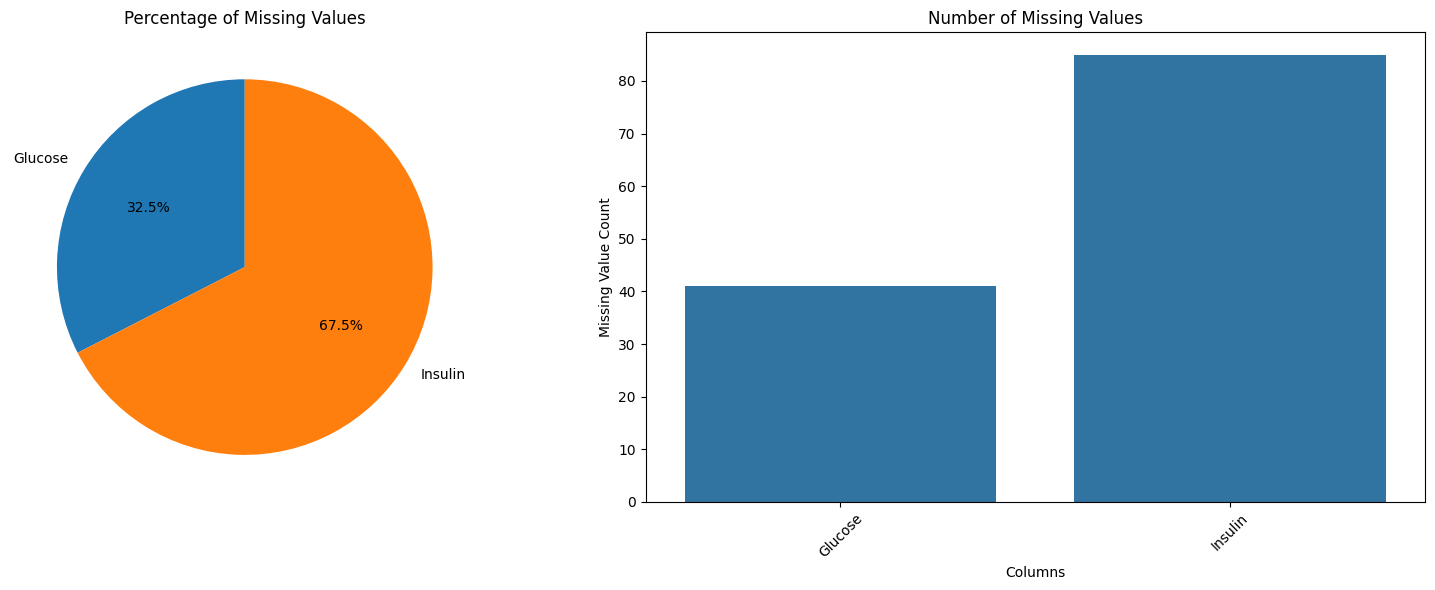

In [41]:
def plot_missing_data(df):

    missing_percentages = df.isnull().mean() * 100
    missing_counts = df.isnull().sum()
    missing_percentages = missing_percentages[missing_percentages > 0]
    missing_counts = missing_counts[missing_counts > 0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.pie(missing_percentages, labels=missing_percentages.index, 
            autopct='%1.1f%%', startangle=90)
    ax1.set_title('Percentage of Missing Values')
    sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=ax2)
    ax2.set_title('Number of Missing Values')
    ax2.set_xlabel('Columns')
    ax2.set_ylabel('Missing Value Count')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
plot_missing_data(data)

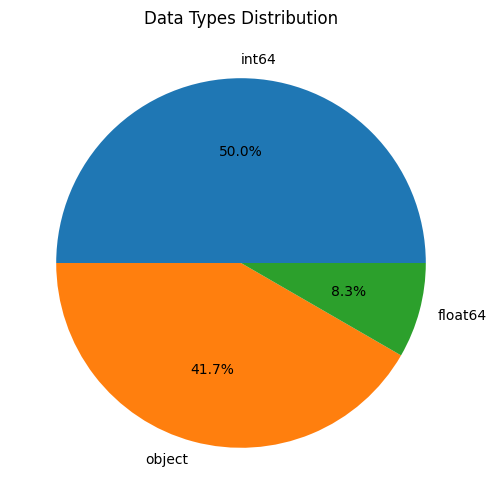

In [40]:
def plot_data_types_distribution(df):
    plt.figure(figsize=(10, 6))
    dtype_counts = df.dtypes.value_counts()
    plt.pie(dtype_counts, labels=dtype_counts.index, autopct='%1.1f%%')
    plt.title('Data Types Distribution')
    plt.show()

plot_data_types_distribution(df)

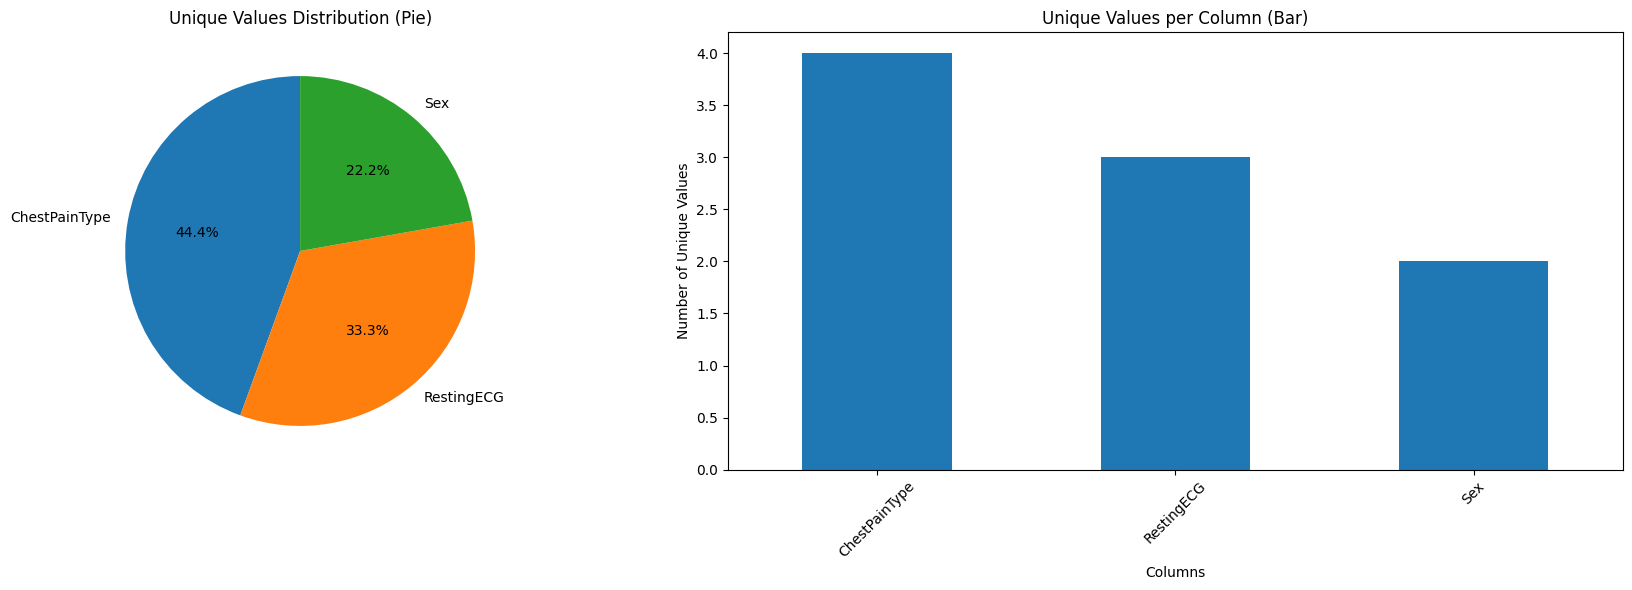

In [39]:
def plot_unique_values(df, features):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    unique_counts = df[features].nunique()
    axes[0].pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Unique Values Distribution (Pie)')

    unique_counts.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Unique Values per Column (Bar)')
    axes[1].set_xlabel('Columns')
    axes[1].set_ylabel('Number of Unique Values')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_unique_values(df, features2)


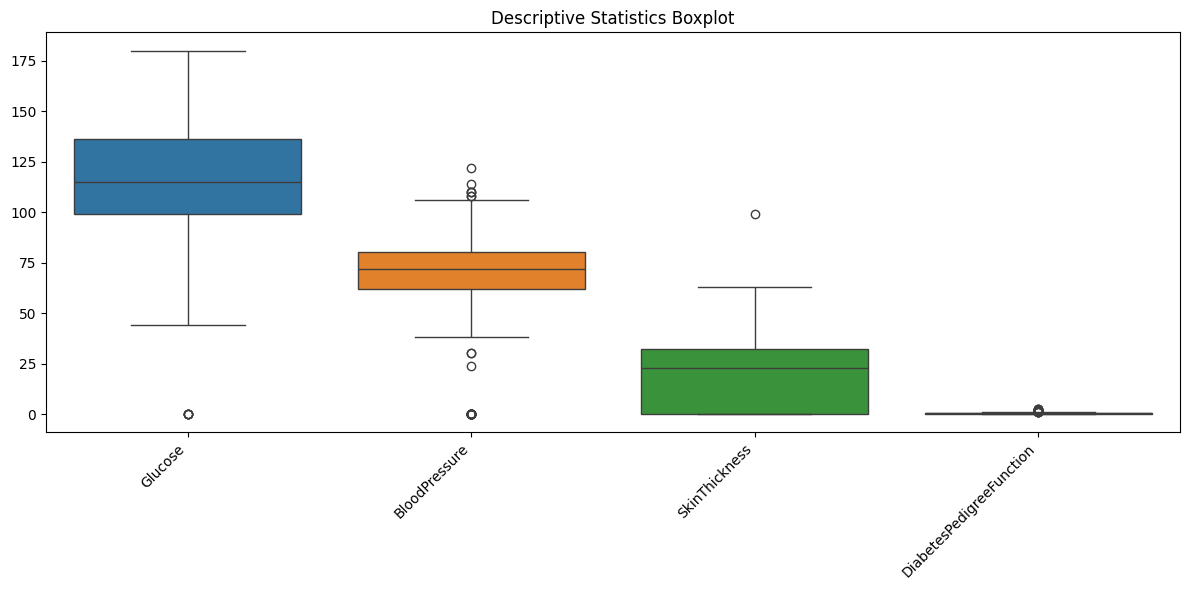

In [ ]:
def plot_descriptive_statistics(df, features):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[features])
    plt.title('Descriptive Statistics Boxplot')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_descriptive_statistics(data, features)

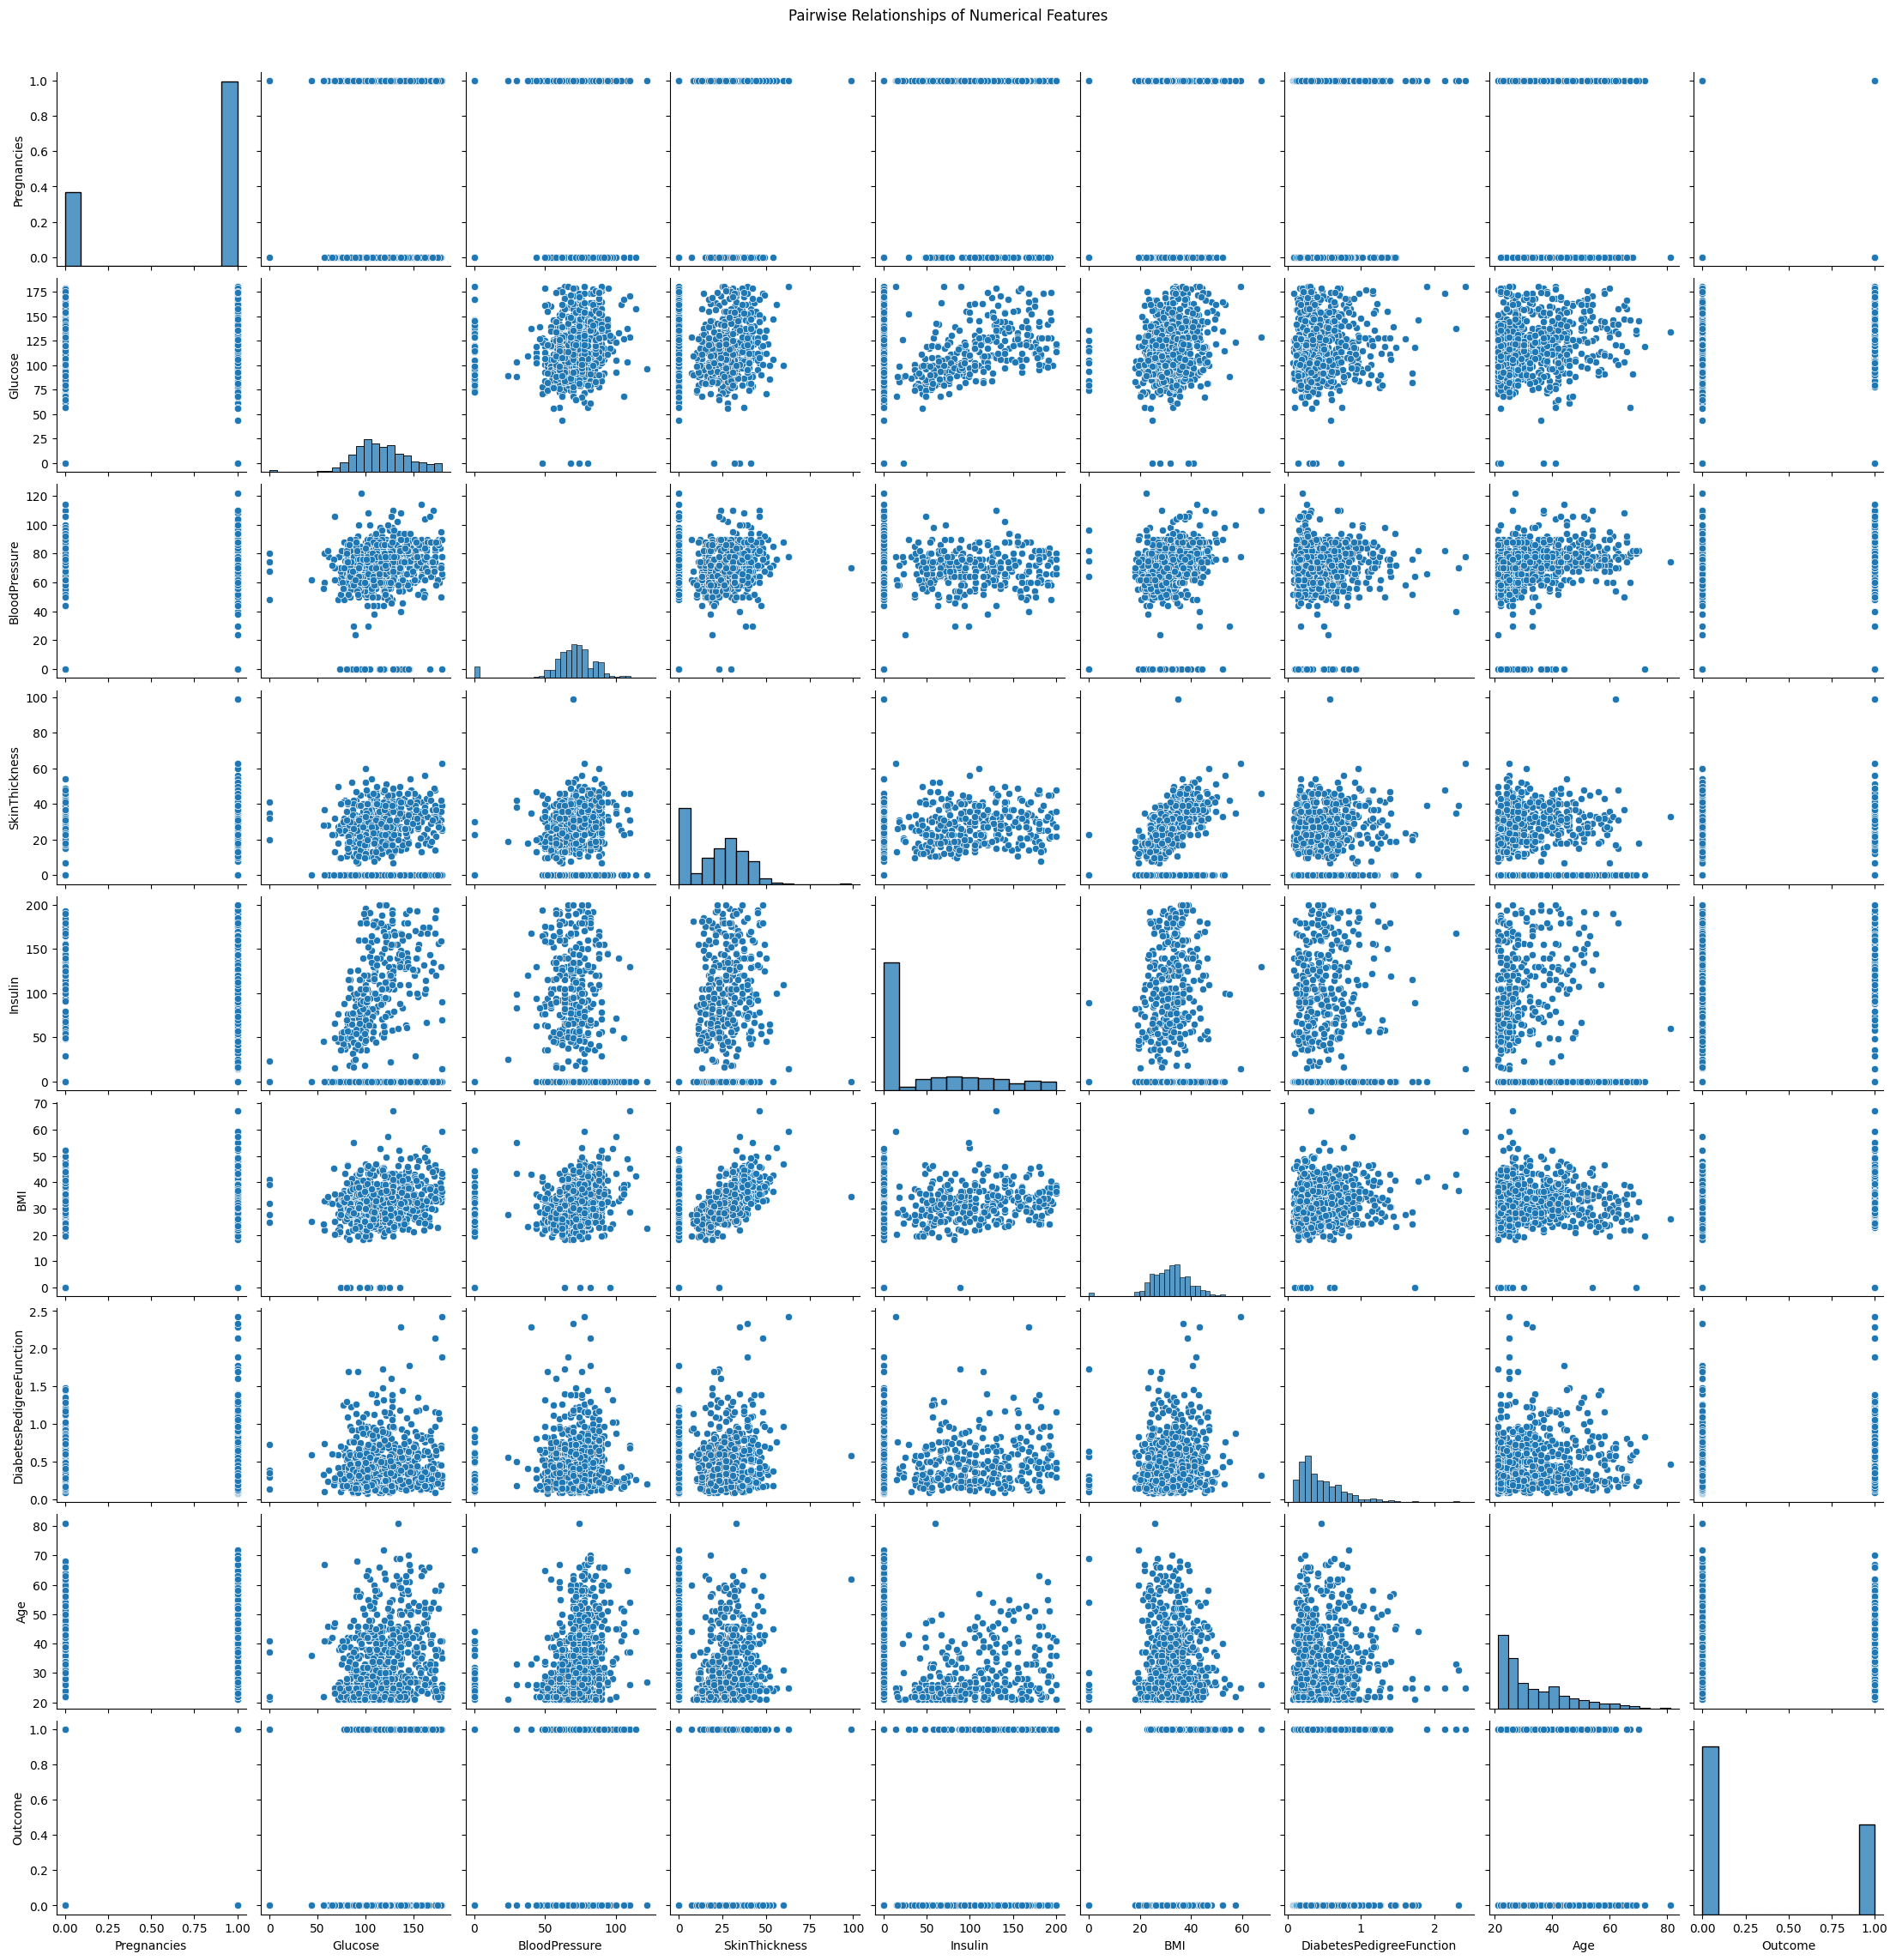

In [ ]:
def plot_pairwise_relationships(df):

    numeric_df = df.select_dtypes(include=[np.number])
    
    # Create pairplot
    fig = sns.pairplot(numeric_df, diag_kind='hist')
    fig.fig.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
    plt.show()

plot_pairwise_relationships(data)

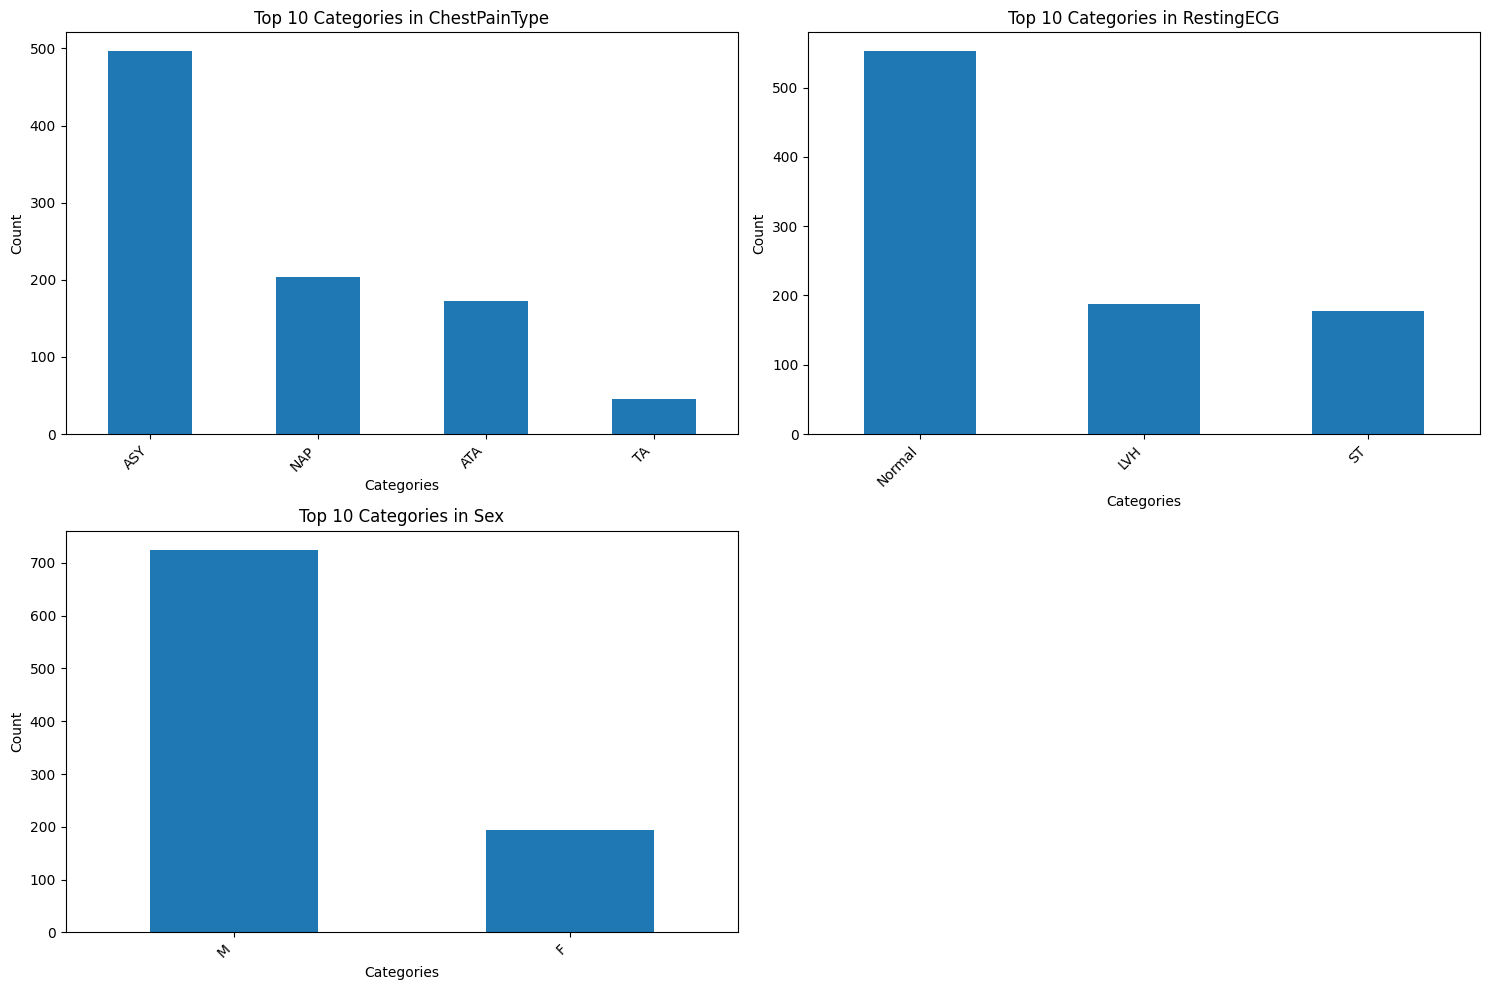

In [36]:
def plot_categorical_distributions(df, features):

    n_cols = len(features)
    n_rows = (n_cols + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(features):
        value_counts = df[col].value_counts()
        
        top_10 = value_counts.head(10)
        top_10.plot(kind='bar', ax=axes[i])
        
        axes[i].set_title(f'Top 10 Categories in {col}')
        axes[i].set_xlabel('Categories')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        plt.setp(axes[i].get_xticklabels(), ha='right')
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    return 

plot_categorical_distributions(df , features2)

Numerical Data Charts

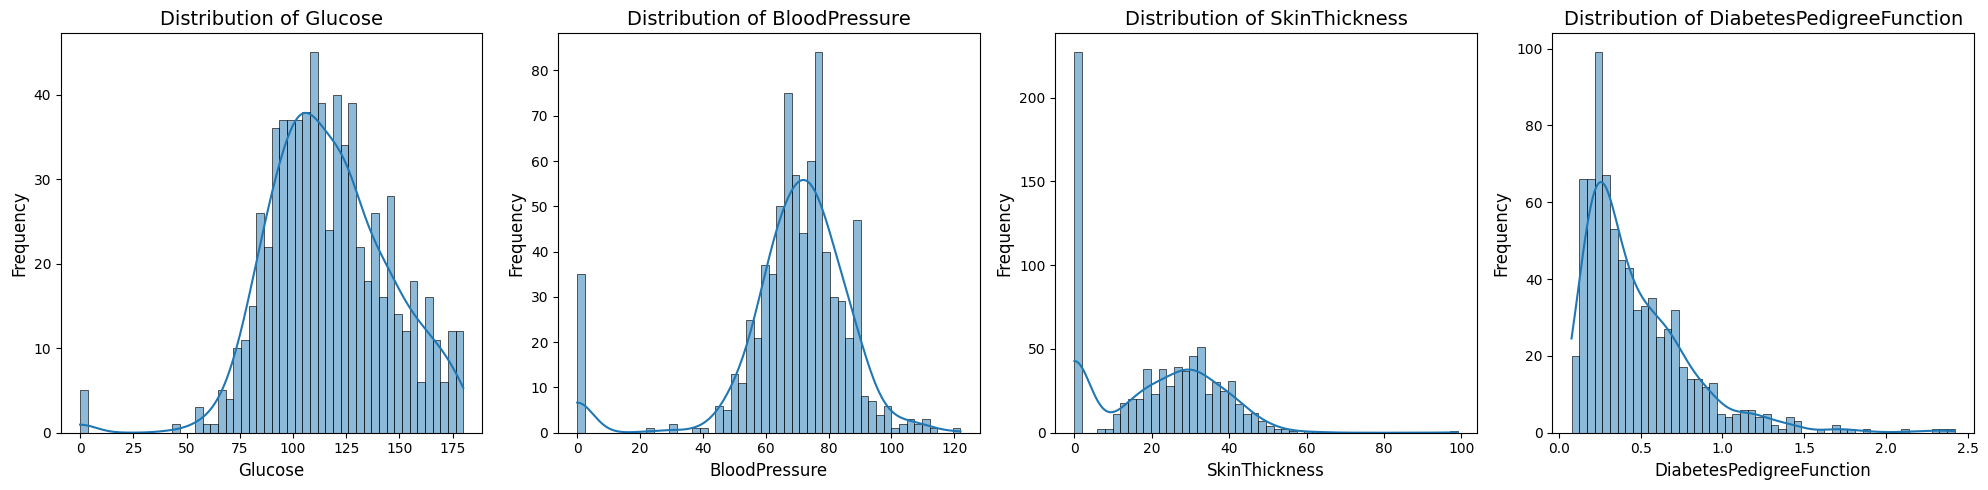

In [12]:
def histPlot(df, features, max_cols_per_row):

    numeric_columns = features
    num_cols = len(numeric_columns)
    num_rows = math.ceil(num_cols / max_cols_per_row)
    fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(5 * max_cols_per_row, 5 * num_rows))
    axes = axes.flatten()  
    for i, col in enumerate(numeric_columns):
        sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

histPlot(data, features, 4)


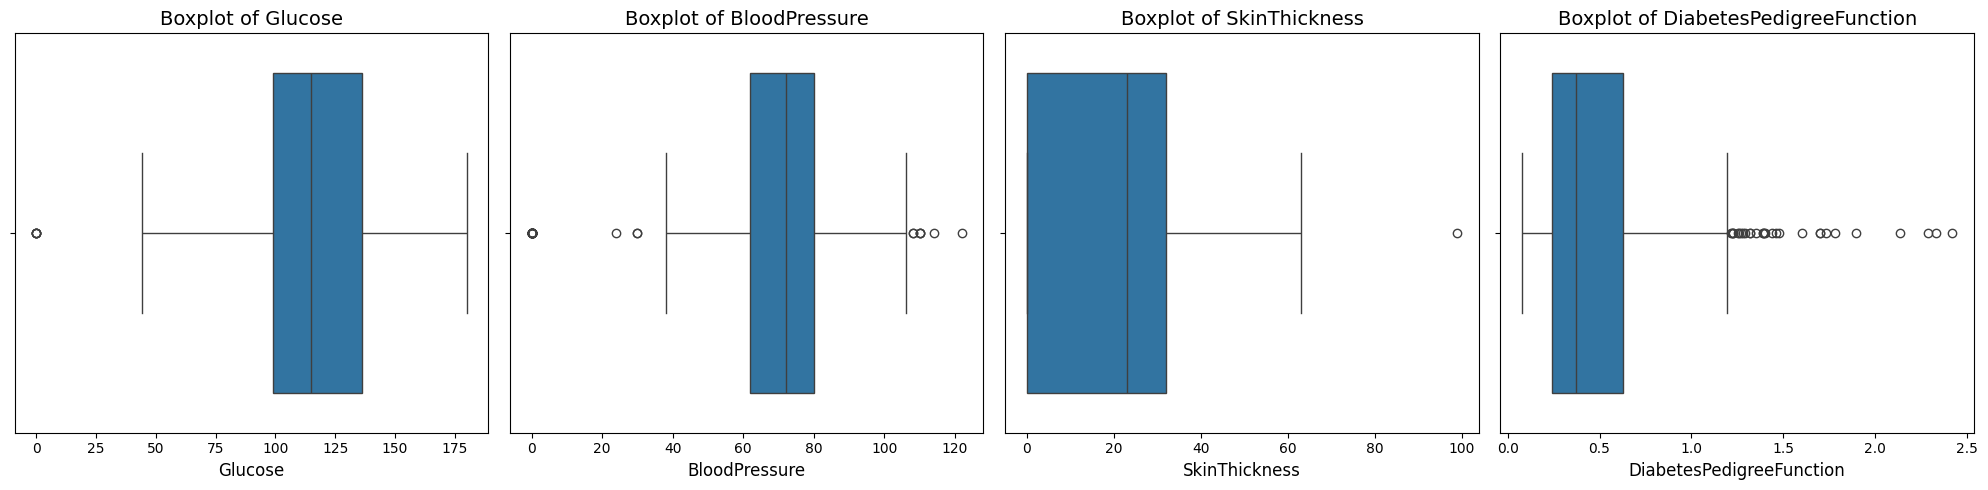

In [13]:
def boxPlot(df, features, max_cols_per_row=3):
   
    num_cols = len(features)
    num_rows = math.ceil(num_cols / max_cols_per_row)
    fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(5 * max_cols_per_row, 5 * num_rows))
    axes = axes.flatten() 
    for i, col in enumerate(features):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()


boxPlot(data, features, 4)


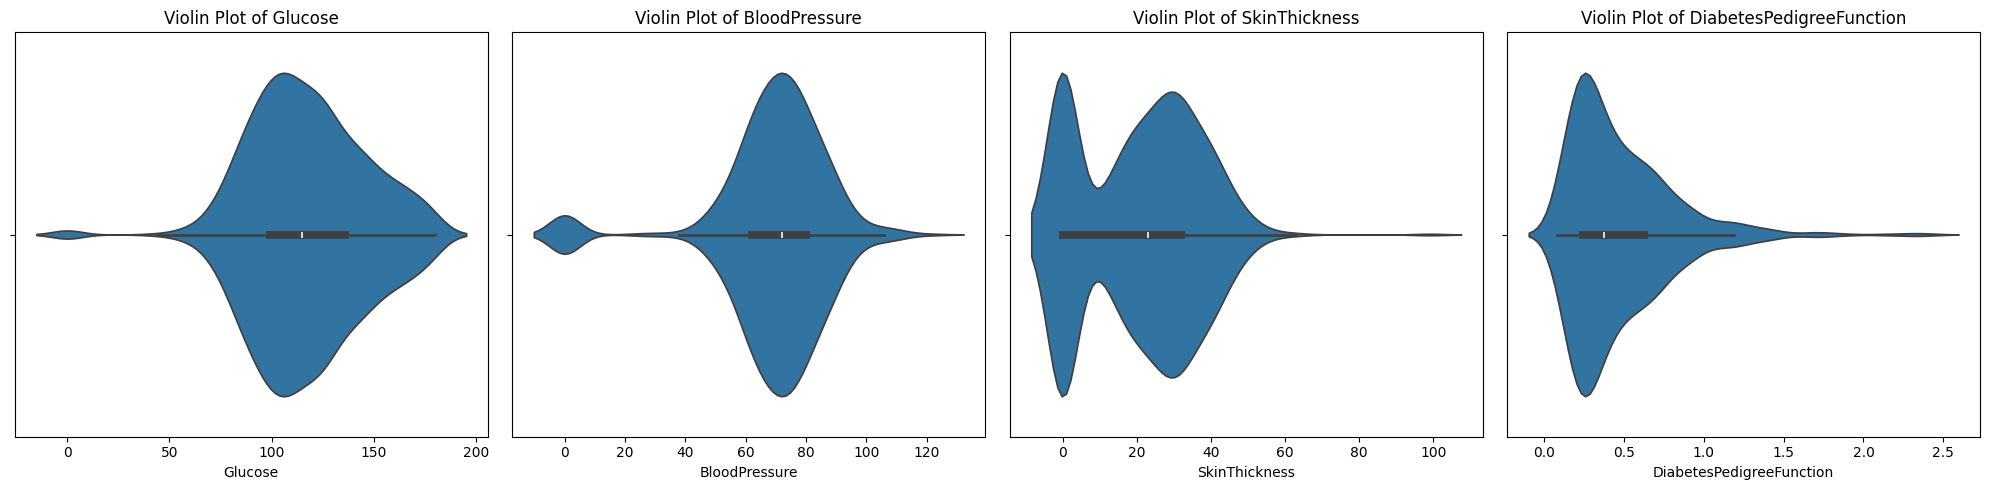

In [14]:
def violinPlot(df, features, max_cols_per_row):
    
    num_cols = len(features)
    num_rows = math.ceil(num_cols / max_cols_per_row)
    fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(5 * max_cols_per_row, 5 * num_rows))
    axes = axes.flatten() 
    for i, col in enumerate(features):
        sns.violinplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"Violin Plot of {col}")
        axes[i].set_xlabel(col)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
violinPlot(data, features, 4)   

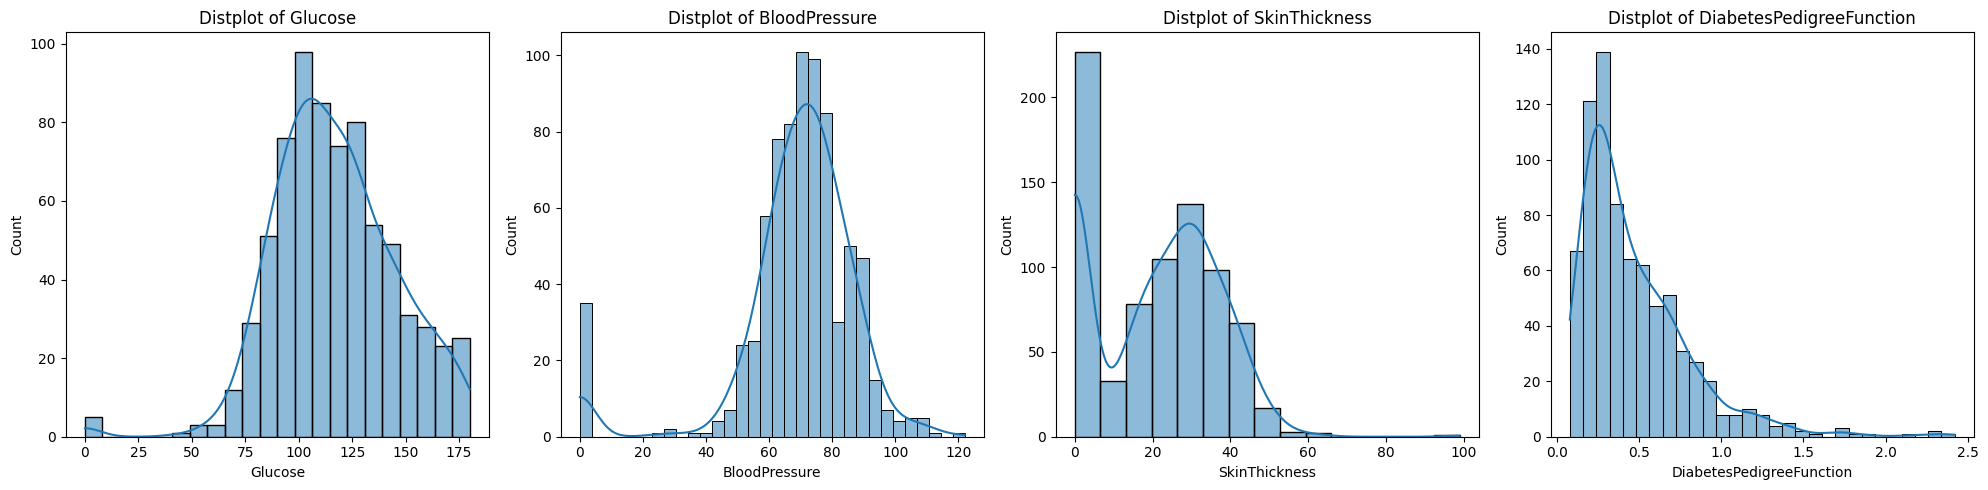

In [15]:
def distPlot(df, features, max_cols_per_row):
    num_cols = len(features)
    num_rows = math.ceil(num_cols / max_cols_per_row)
    fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(5 * max_cols_per_row, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(features):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Distplot of {col}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


distPlot(data, features, 4)


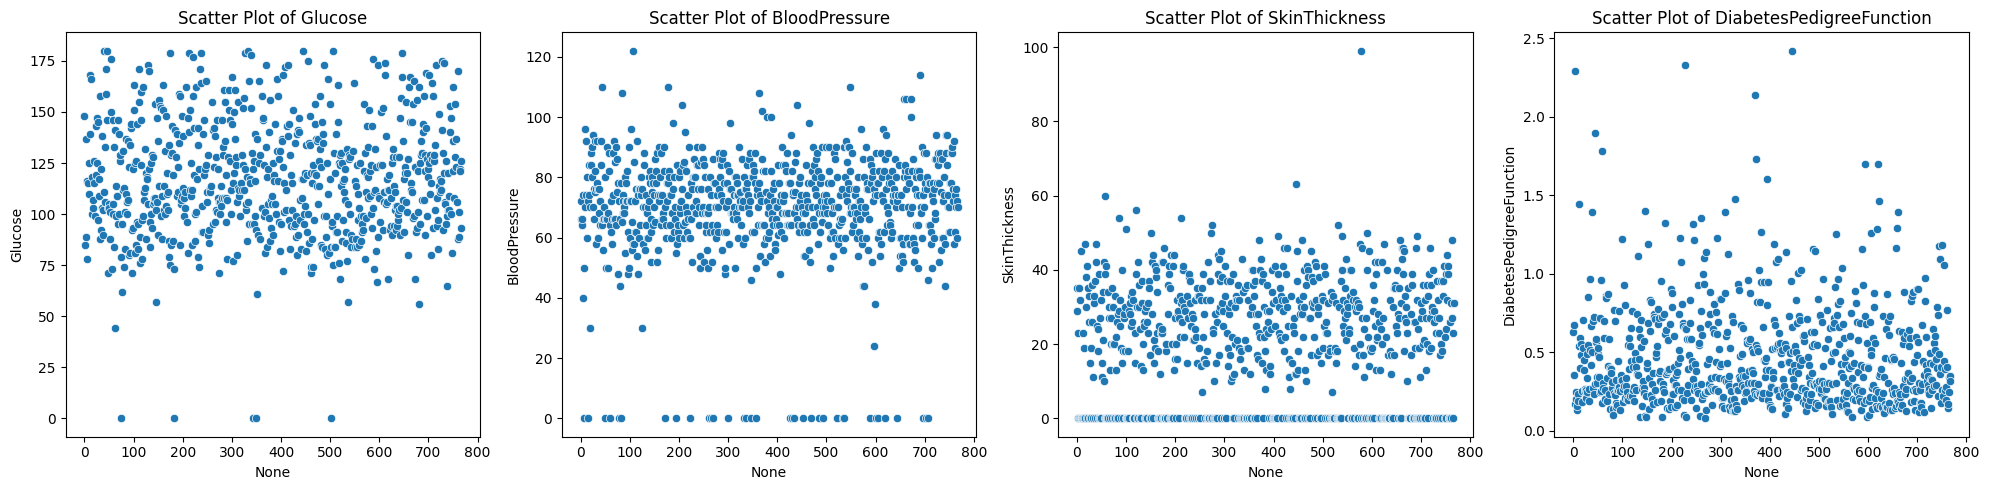

In [16]:
def scatterPlot(df, features, max_cols_per_row):
    num_cols = len(features)
    num_rows = math.ceil(num_cols / max_cols_per_row)
    fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(5 * max_cols_per_row, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(features):
        sns.scatterplot(data=df, x=df.index, y=col, ax=axes[i])
        axes[i].set_title(f"Scatter Plot of {col}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

scatterPlot(data, features, 4)


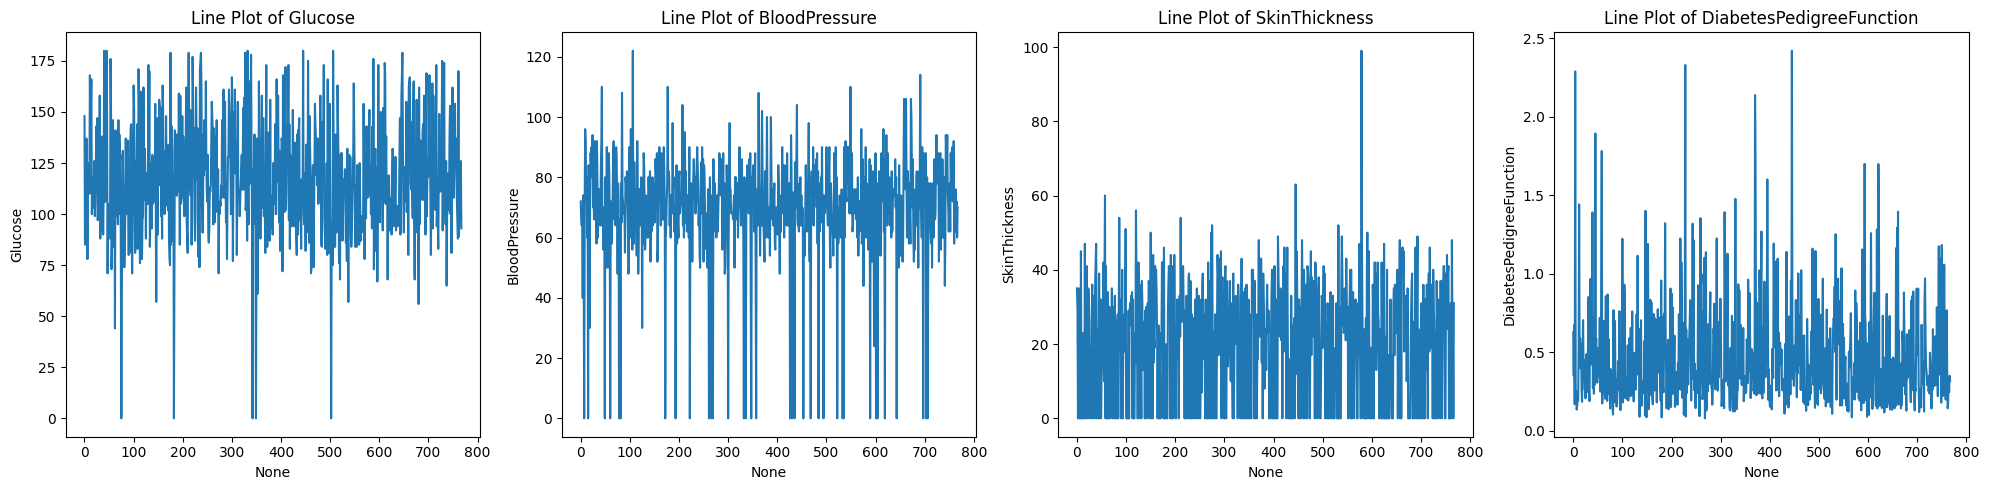

In [17]:
def linePlot(df, features, max_cols_per_row):
    num_cols = len(features)
    num_rows = math.ceil(num_cols / max_cols_per_row)
    fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(5 * max_cols_per_row, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(features):
        sns.lineplot(data=df, x=df.index, y=col, ax=axes[i])
        axes[i].set_title(f"Line Plot of {col}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
linePlot(data, features, 4)

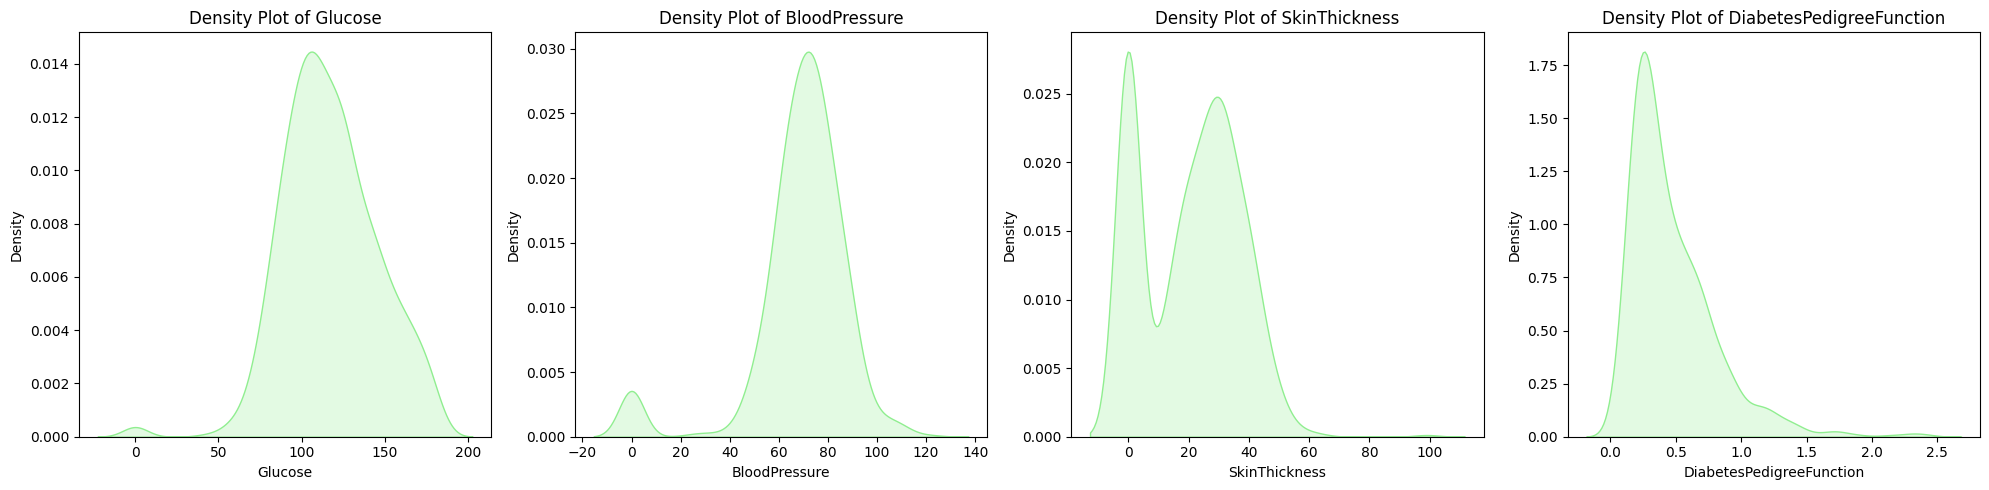

In [35]:

def plot_kde_distributions(df, features, max_cols_per_row):

    numerical_cols = features
    num_cols = len(numerical_cols)
    num_rows = math.ceil(num_cols / max_cols_per_row) 
    fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(5 * max_cols_per_row, 5 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.kdeplot(df[col].dropna(), ax=axes[i], fill=True, color='lightgreen')
        axes[i].set_title(f'Density Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    return 

plot_kde_distributions(data, features, 4)

Categorical Data Charts

<Figure size 1000x600 with 0 Axes>

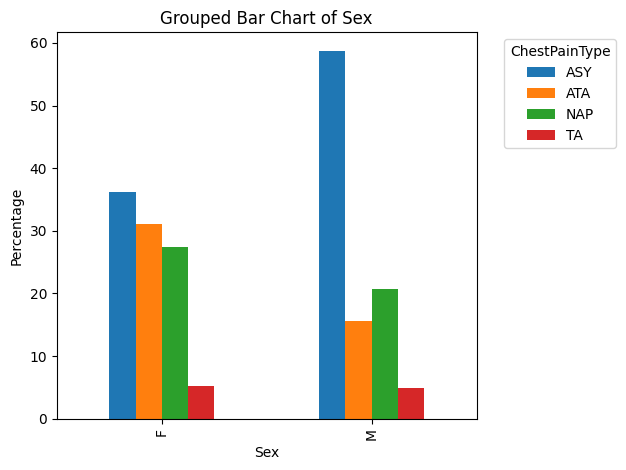

In [19]:
def create_grouped_categorical_bar(data, category_column, value_column, 
                                    aggregate_func='count', 
                                    figsize=(10,6)):
    if aggregate_func == 'count':
        pivoted_data = pd.crosstab(data[category_column], 
                                    data[value_column], 
                                    normalize='index') * 100
    else:
        pivoted_data = data.groupby([category_column, value_column])\
                            .size()\
                            .unstack(fill_value=0)
    
    plt.figure(figsize=figsize)
    pivoted_data.plot(kind='bar', stacked=False)
    
    plt.title(f'Grouped Bar Chart of {category_column}')
    plt.xlabel(category_column)
    plt.ylabel('Percentage' if aggregate_func == 'count' else 'Value')
    plt.legend(title=value_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
create_grouped_categorical_bar(df,"Sex" ,"ChestPainType")

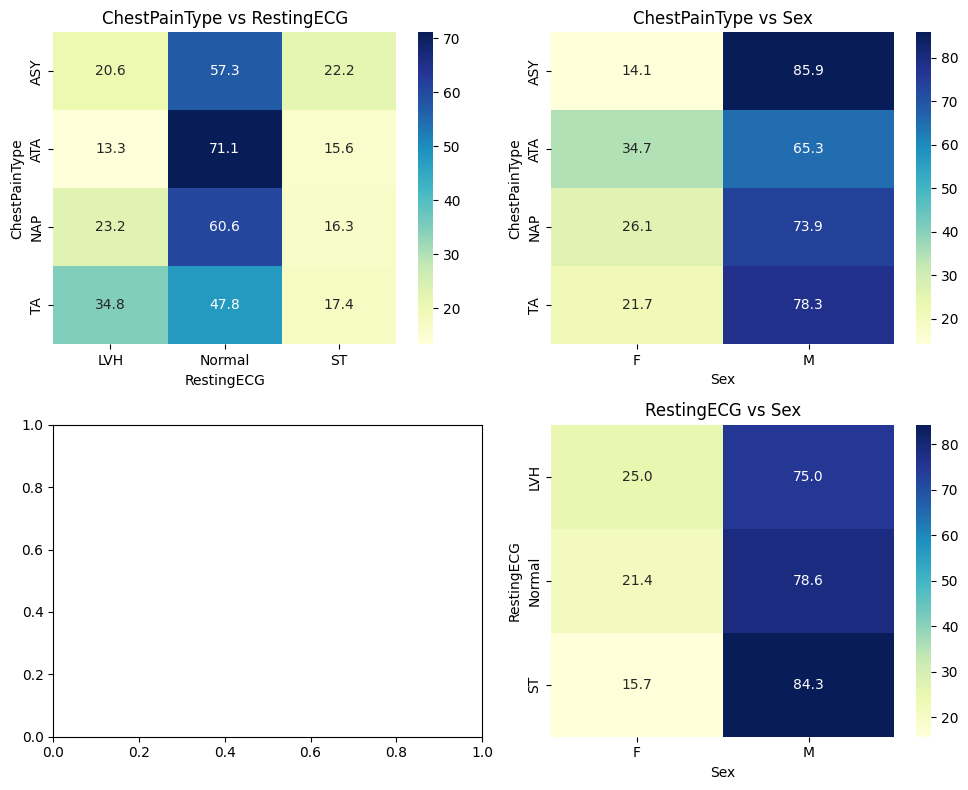

In [50]:
def visualize_categorical_relationships(data, categorical_columns):

    n_columns = len(categorical_columns)
    fig, axes = plt.subplots(n_columns-1, n_columns-1, figsize=(5*(n_columns-1), 4*(n_columns-1)))
    for i in range(n_columns-1):
        for j in range(i+1, n_columns):
            crosstab = pd.crosstab(data[categorical_columns[i]], 
                                   data[categorical_columns[j]], 
                                   normalize='index') * 100
            sns.heatmap(crosstab, 
                        ax=axes[i, j-1], 
                        annot=True, 
                        cmap='YlGnBu', 
                        fmt='.1f')
            
            axes[i, j-1].set_title(f'{categorical_columns[i]} vs {categorical_columns[j]}')
            axes[i, j-1].set_xlabel(categorical_columns[j])
            axes[i, j-1].set_ylabel(categorical_columns[i])
    
    plt.tight_layout()
    plt.show()
    
visualize_categorical_relationships(df, features2)

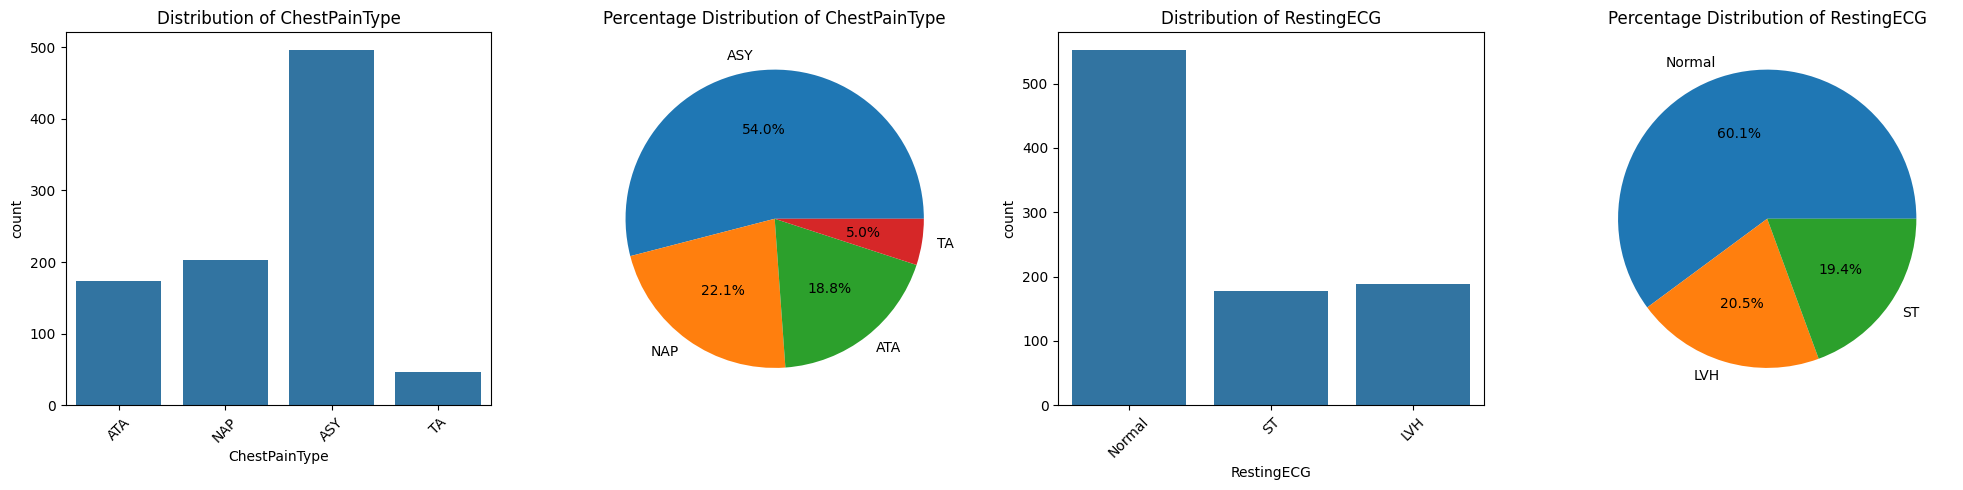

In [48]:
def plot_category_comparison(dataset, columns=None, rows=1):
    if columns is None:
        columns = dataset.select_dtypes(include=['object', 'category']).columns
    n_cols = rows
    fig, axes = plt.subplots(1, n_cols*2, figsize=(10*n_cols, 5), squeeze=False)
    axes = axes.ravel()
    extended_columns = list(columns) + [None] * (n_cols - len(columns))
    for i in range(n_cols):
        if extended_columns[i] is not None:
            sns.countplot(x=extended_columns[i], data=dataset, ax=axes[i*2])
            axes[i*2].set_title(f'Distribution of {extended_columns[i]}')
            axes[i*2].tick_params(axis='x', rotation=45)
            percentages = dataset[extended_columns[i]].value_counts(normalize=True) * 100
            axes[i*2+1].pie(percentages, 
                             labels=percentages.index, 
                             autopct='%1.1f%%')
            axes[i*2+1].set_title(f'Percentage Distribution of {extended_columns[i]}')
        else:
            axes[i*2].axis('off')
            axes[i*2+1].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_category_comparison(df, features2, 2)

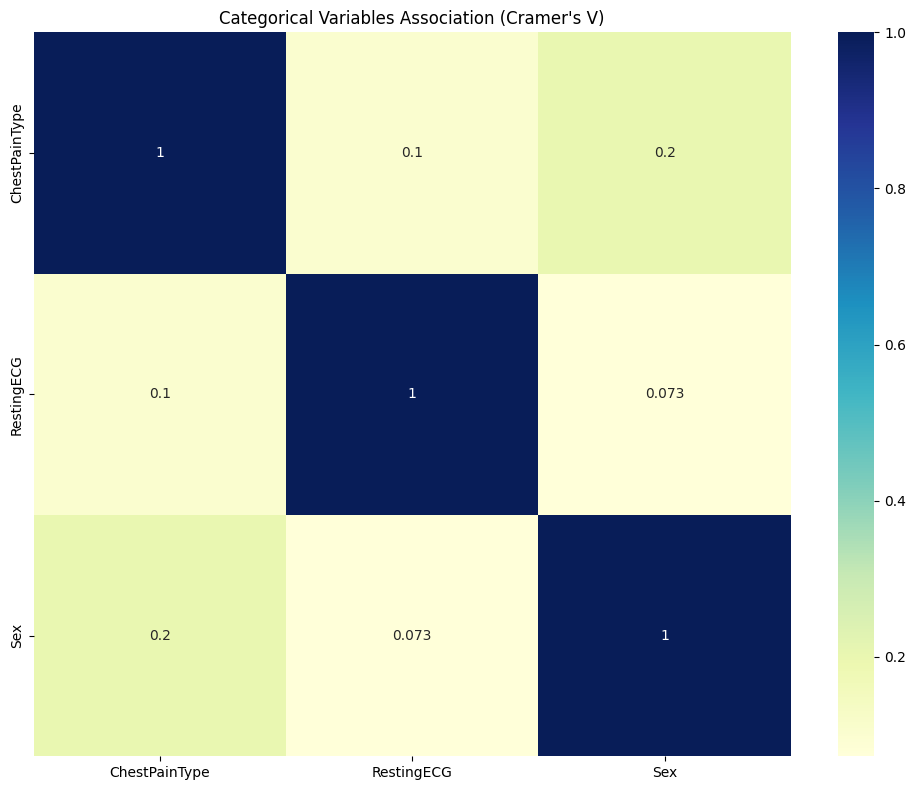

In [47]:
def plot_heatmap_association(dataset, categorical_columns):

    association_matrix = np.zeros((len(categorical_columns), len(categorical_columns)))
    
    for i, col1 in enumerate(categorical_columns):
        for j, col2 in enumerate(categorical_columns):
            association_matrix[i, j] = cramers_v(dataset, col1, col2)

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(association_matrix, 
                xticklabels=categorical_columns, 
                yticklabels=categorical_columns, 
                annot=True, 
                cmap='YlGnBu')
    plt.title("Categorical Variables Association (Cramer's V)")
    plt.tight_layout()
    plt.show()

plot_heatmap_association(df, features2)